# Predictive Analytics
## Module 3 - Inferential Statistics
### Hypothesis testing

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

1. *Cumulative Density Function (CDF)*: **stats.norm.cdf** - Returns the **probability** for an observation **equal to or lesser than** a specific value from the distribution. It can also be thought of as - given a z-score, what is the cumulative probability distribution upto that z-score    
2. *Percent Point Function (PPF)*: **stats.norm.ppf** - Returns the **observation value** for the provided probability that is **less than or equal to** the provided probability from the distribution. It can also be thought of as - given a cumulative probability, what is the z-score
3. CDF is the reverse of PPF

In [ ]:
## 95.45% Confidence interval --> 100% - 95.45% = 4.55%   alpha = 0.0455; alpha/2 = 0.02275
print("95.45% confidence interval")
stats.norm.ppf(0.02275).round(4), stats.norm.ppf(1-0.02275).round(4)


In [ ]:
print("95% confidence interval")
stats.norm.ppf(0.025).round(4), stats.norm.ppf(0.975).round(4)

In [ ]:
## 99.7305% Confidence interval --> 100% - 99.7305% = 0.2695%   alpha = 0.002695; alpha/2 = 0.0013475
print("99.7305% confidence interval")
print((stats.norm.ppf(0.0013475).round(4), stats.norm.ppf(1-0.0013475).round(4)))

## 99% Confidence interval --> 100% - 99% = 1%   alpha = 0.005; alpha/2 = 0.005
print("99% confidence interval")
print((stats.norm.ppf(0.005).round(4), stats.norm.ppf(1-0.005).round(4)))

In [ ]:
print(stats.norm.cdf([-2,2]).round(4))
print(stats.norm.cdf([-1.96,1.96]).round(4))

In [ ]:
# (1 + 0.9545)/2, 1-0.02275

In [ ]:
# 0.9772-0.0228

### Hypothesis testing using Z-test and p-value

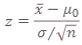

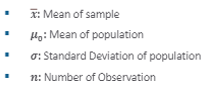


### p-value
Sampling(or statistics) can never be perfect. We will always come across some weird samples which might give us incorrect impression e.g. one random sample with mean weight much lesser than actual weight does not mean that there is a problem with overall weights using all other samples.

It can be defined as the probability value of getting the statistical summary result equal to or more extreme than the actual observed results, given that the null hypothesis is true. *A p-value is the probability that the results from your sample data occurred by chance.*

**If your p-value is less than the chosen significance level then you reject the null hypothesis i.e. accept that your sample gives reasonable evidence to support the alternative hypothesis.** It does NOT imply a "meaningful" or "important" difference; that is for you to decide when considering the real-world relevance of your result.

### Example 1

A principal at a certain school claims that the students in his school are above average intelligence. A random sample of thirty students IQ scores have a mean score of 112.5. Is there sufficient evidence to support the principal’s claim? The mean population IQ is 100 with a standard deviation of 15. Use <b>alpha=0.05</b>

Null hypothesis - The accepted fact is that the population mean is 100, so: <b>H0: μ=100.</b>
<br>Alternate Hypothesis - The claim is that the students have above average IQ scores, so: <b>H1: μ > 100.</b>
<br>The fact that we are looking for scores “greater than” a certain point means that this is a <b>one-tailed test.</b>

In [ ]:
##10% level of significance
stats.norm.ppf(.05),stats.norm.ppf(.95)
##5% level of significance
##stats.norm.ppf(.025),stats.norm.ppf(.975)

alpha=0.05
<br>An area of .05 is equal to a <b>critcal value z-score of 1.64</b>

In [ ]:
xbar = 112.5
μ =100
sigma = 15
n = 30
z_test_stat = (xbar - μ)/(sigma/np.sqrt(n))
print('Z test statistic:', z_test_stat.round(4))
print('Critical Value Z score:', 1.64)

**Z-test**: 
- Since, this is a right tailed test, the test-statistic should be greater than z-score to reject the null hypothesis
- If it’s less than z-score, you cannot reject the null hypothesis

*In this case, it is greater (4.56 > 1.64), so you can reject the null hypothesis*

**p-value**

In [ ]:
# this value represents the entire region below the mark
p_val_upper_region = stats.norm.cdf(z_test_stat)
# actual p-value can be given as 1-the above value
p_val_upper_region = 1 - p_val_upper_region
p_val_upper_region

In [ ]:
# p_val_lower_region = stats.norm.cdf(-1*z_test_stat)
# p_val_lower_region

In [ ]:
# thus the total p-value can be given as the sum of these two values
# p_val = p_val_lower_region + p_val_upper_region
# p_val

*p-value is smaller than our alpha value of .05. That means we can reject the null hypothesis.*

### Example 2

A sample of 200 people has a mean age of 21 with a population standard deviation (σ) of 5. Test the hypothesis that the population mean is 18.9 at α = 0.05.

* Null hypothesis - H0: μ = 18.9
* Alternative hypothesis - H1: μ ≠ 18.9

In [ ]:
μ0 = 18.9
σ = 5
xbar = 21
n = 200

se = σ/np.sqrt(n)
z_test_stat = (xbar - μ0)/se
z_test_stat.round(3)

In [ ]:
# this value represents the entire region below the mark
p_val_upper_region = stats.norm.cdf(z_test_stat)
# actual p-value can be given as 1-the above value
p_val_upper_region = 1 - p_val_upper_region
p_val_upper_region

In [ ]:
p_val_lower_region = stats.norm.cdf(-1*z_test_stat)
p_val_lower_region

In [ ]:
# thus the total p-value can be given as the sum of these two values
p_val = p_val_lower_region + p_val_upper_region
p_val

*p-value is smaller than our alpha value of .05. That means we should reject the null hypothesis.*

### Hypothesis testing using t-test and p-value

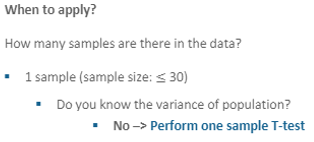

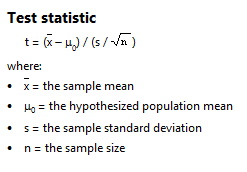

### Example 3
An engineer measured the Brinell hardness of 25 pieces of ductile iron that were subcritically annealed. The resulting data were: [170,167,174,179,179,187,179,183,179,156,163,156,187,156,167,156,174,170,183,179,174,179,170,159,187]

The engineer hypothesized that the mean Brinell hardness of all such ductile iron pieces is greater than 170. Therefore, he was interested in testing the hypotheses:
* H0: μ = 170
* HA: μ > 170

The engineer did some basic statistics:
* *n=25, xbar=172.52, s=10.31, se=2.06*

In [ ]:
sample = [170,167,174,179,179,187,179,183,179,156,163,156,187,156,167,156,174,170,183,179,174,179,170,159,187]
sample = pd.Series(sample)

In [ ]:
n = len(sample)
xbar = sample.mean().round(2)
s = sample.std().round(3)
μ = 170
print(n, xbar, s)
# n=25
# xbar=172.52
# s=10.31
# se=2.06

In [ ]:
tt = (xbar - μ)/(s/np.sqrt(n)) # t-statistic for mean
pval = stats.t.sf(np.abs(tt), n-1)*2  # two-sided pvalue = Prob(abs(t)>tt)
print ('t-statistic = %6.3f ,  pvalue = %6.4f' % (tt, pval))

In [ ]:
stats.ttest_1samp(a= sample, popmean= 170)

##### Calculating the upper bound for the t-statistic. This is a one-tailed test as were are interested only in the μ > 170

In [ ]:
#upper bound at 5% significance
stats.t.ppf(q=0.95,  # Quantile to check
            df=len(sample)-1)  # Degrees of freedom

In [ ]:
#lower bound
#stats.t.ppf(q=0.05,  # Quantile to check
#            df=len(sample)-1)  # Degrees of freedom (sample size minus 1)

#### t-test-statistic
If the engineer set his significance level α at 0.05 and used the critical value approach to conduct his hypothesis test, he would reject the null hypothesis if his t-test statistic were greater than 1.7109:

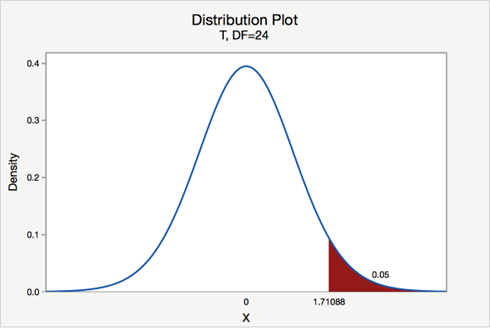


*Since the engineer's t-test statistic (1.22), is not greater than 1.7109, the engineer fails to reject the null hypothesis. That is, the test statistic does not fall in the "critical region." There is insufficient evidence, at the  α = 0.05 level, to conclude that the mean Brinell hardness of all such ductile iron pieces is greater than 170.*

#### p-value
*Since the p-value, 0.233, is greater than  = 0.05, the engineer fails to reject the null hypothesis. There is insufficient evidence, at the α = 0.05 level, to conclude that the mean Brinell hardness of all such ductile iron pieces is greater than 170.*

**Note that the engineer obtains the same scientific conclusion regardless of the approach used. This will always be the case**

### Specifically, the four steps involved in using the P-value approach to conducting any hypothesis test are:
* Specify the null and alternative hypotheses.
* Using the sample data and assuming the null hypothesis is true, calculate the value of the test statistic. Again, to conduct the hypothesis test for the population mean μ, we use the t-statistic t=(xbar-mu)/se,  where se=s/sq.root(n), which follows a t-distribution with n - 1 degrees of freedom.
* Using the known distribution of the test statistic, calculate the P-value: "If the null hypothesis is true, what is the probability that we'd observe a more extreme test statistic in the direction of the alternative hypothesis than we did?" (Note how this question is equivalent to the question answered in criminal trials: "If the defendant is innocent, what is the chance that we'd observe such extreme criminal evidence?")
* Set the significance level, α, the probability of making a Type I error to be small — 0.01, 0.05, or 0.10. Compare the P-value to α. If the P-value is less than (or equal to) α, reject the null hypothesis in favor of the alternative hypothesis. If the P-value is greater than α, do not reject the null hypothesis.


**Given a t-value and a degrees of freedom, you can use the "survival function" sf of scipy.stats.t** (aka the complementary CDF) to compute the one-sided p-value. The first argument is the T value, and the second is the degrees of freedom.

For example, the critical t-value for p=0.1 is 3.078. Here's how you can verify that with t.sf:

In [ ]:
from scipy.stats import t
t.sf(3.078, 1)

* *Approximately 0.1, as expected.*
* *For the two-sided p-value, just double the one-sided p-value.*